Upload your training dataset 


Saving kalyan train data.xlsx to kalyan train data (5).xlsx
Dataset Loaded Successfully


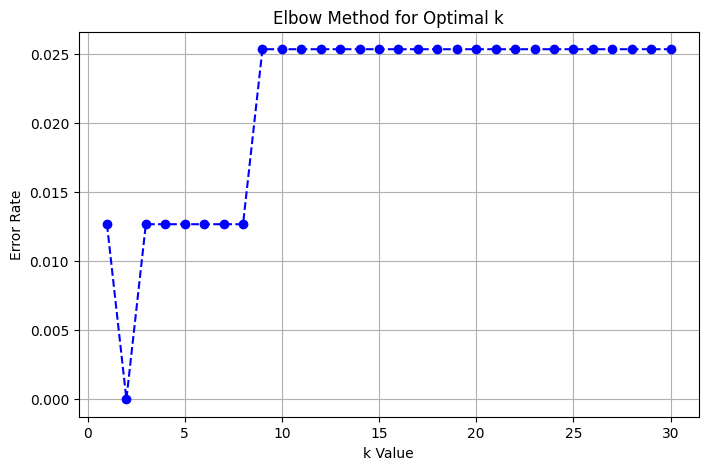

Suggested optimal k: 2

===== KNN Performance Comparison =====

Minkowski Distance:
Accuracy: 100.00%
              precision    recall  f1-score   support

   Groundnut       1.00      1.00      1.00        15
   Jackfruit       1.00      1.00      1.00         2
      grapes       1.00      1.00      1.00        37
        jute       1.00      1.00      1.00        11
 kidneybeans       1.00      1.00      1.00        14

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

----------------------------------------
Euclidean Distance:
Accuracy: 100.00%
              precision    recall  f1-score   support

   Groundnut       1.00      1.00      1.00        15
   Jackfruit       1.00      1.00      1.00         2
      grapes       1.00      1.00      1.00        37
        jute       1.00      1.00      1.00        11
 kidneybeans       1.00      1.00      1.00        14

    

Saving kalyan test data.xlsx to kalyan test data (5).xlsx
Test Data Loaded

Prediction Summary:
Total Samples: 155
Correct Predictions: 137
Incorrect Predictions: 18
Accuracy on Test File: 88.39%
Results saved as 'test_with_predictions.xlsx'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from google.colab import files

print("Upload your training dataset ")
uploaded = files.upload()
train_file = list(uploaded.keys())[0]

data = pd.read_excel(train_file)
print("Dataset Loaded Successfully")

X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

error_rates = []
K = range(1, 31)

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

plt.figure(figsize=(8, 5))
plt.plot(K, error_rates, marker='o', linestyle='dashed', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

optimal_k = K[np.argmin(error_rates)]
print(f"Suggested optimal k: {optimal_k}")

metrics_list = [
    ("minkowski", "Minkowski"),
    ("euclidean", "Euclidean"),
    ("manhattan", "Manhattan")
]

print("\n===== KNN Performance Comparison =====\n")
results = {}

for metric, metric_name in metrics_list:
    model = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    results[metric_name] = acc
    print(f"{metric_name} Distance:")
    print(f"Accuracy: {acc:.2f}%")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

best_metric = max(results, key=results.get)
best_accuracy = results[best_metric]

print("\n===== Best KNN Method Identified =====")
print(f"Best KNN Method: {best_metric}")
print(f"Accuracy: {best_accuracy:.2f}%")
print("======================================\n")

if "Minkowski" in best_metric:
    metric_code = "minkowski"
elif "Euclidean" in best_metric:
    metric_code = "euclidean"
else:
    metric_code = "manhattan"

print("Upload your test data file ")
uploaded_test = files.upload()
test_file = list(uploaded_test.keys())[0]

test_data = pd.read_excel(test_file)
print("Test Data Loaded")

test_data = test_data.dropna(how='all')
cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
test_data[cols] = test_data[cols].fillna(test_data[cols].mean())

final_model = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric_code)
final_model.fit(X_train, y_train)

X_new = scaler.transform(test_data[cols])
predicted_labels = final_model.predict(X_new)
test_data['Predicted'] = predicted_labels

if 'label' in test_data.columns:
    total_rows = len(test_data)
    correct = np.sum(test_data['label'] == test_data['Predicted'])
    incorrect = total_rows - correct
    accuracy = correct / total_rows * 100
    print("\nPrediction Summary:")
    print(f"Total Samples: {total_rows}")
    print(f"Correct Predictions: {correct}")
    print(f"Incorrect Predictions: {incorrect}")
    print(f"Accuracy on Test File: {accuracy:.2f}%")
else:
    print("No 'label' column found in test data so predictions cannot be compared.")

output_file = "test_with_predictions.xlsx"
test_data.to_excel(output_file, index=False)
print(f"Results saved as '{output_file}'")
files.download(output_file)
